In [2]:
# Data Imports
import numpy as np
import pandas as pd


# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [3]:
# Reading csv files
games_women = pd.read_csv('athletes-women.csv')
games_men = pd.read_csv('athletes-men.csv')
athletes = pd.read_csv('athletes-all.csv')

# athletes who made it into the games
games_all = pd.concat([games_women, games_men])
games_women = games_women.drop(columns = ['rank', 'latitude', 'longitude', 'name', 'region'])
games_men = games_men.drop(columns = ['rank', 'latitude', 'longitude', 'name', 'region'])

/Users/nadinelin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = athletes.merge(games_all.drop_duplicates(), on=['athlete_id'],
                   how='left', indicator=True)

In [5]:
# taking only the columns we want
df_all = df[['athlete_id', 'age_x', 'gender', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', '_merge', 'train', 'experience', 'schedule', 'howlong_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x']]
df_all = df_all.dropna()

df_all_women = df_all.loc[df_all['gender'] == 'Female']
df_all_men = df_all.loc[df_all['gender'] == 'Male']

In [6]:
# ones who have not made it who have stats filled out, temp while cleaning up
def make_columns_numeric(df):    
    not_make = df.loc[df['_merge'] == 'left_only']
    not_make['howlong_x'] = not_make['howlong_x'].str.slice(0, 6)

    col         = 'howlong_x'
    conditions  = [ not_make[col].str.contains("Less"), not_make[col].str.contains("6-12"), not_make[col].str.contains("1-2"), not_make[col].str.contains("2-4"), not_make[col].str.contains("4+") ]
    choices     = [0,1,2,3,4]

    not_make["howlong"] = np.select(conditions, choices)

    not_make['coach'] = np.where(not_make['train'].str.contains("have a coach"), 1, 0)
    not_make['certification'] = np.where(not_make['experience'].str.contains("Level 1"), 1, 0)
    not_make['multiple'] = np.where(not_make['schedule'].str.contains("multiple workouts"), 1, 0)

    return not_make

not_make_women = make_columns_numeric(df_all_women)
not_make_men = make_columns_numeric(df_all_men)


<ipython-input-6-c8e7ef6bae8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_make['howlong_x'] = not_make['howlong_x'].str.slice(0, 6)
<ipython-input-6-c8e7ef6bae8d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_make["howlong"] = np.select(conditions, choices)
<ipython-input-6-c8e7ef6bae8d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [7]:
#not_in_games will contain all athletes that did not make it, with stats, with cleaned up columns
not_in_games_women = not_make_women[['athlete_id', 'age_x', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x','howlong','coach','certification','multiple']]
not_in_games_men = not_make_men[['athlete_id', 'age_x', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x','howlong','coach','certification','multiple']]
not_in_games_women.rename(columns={"age_x": "age",'height_x': 'height', 'weight_x':'weight', 'fran_x':'fran', 'run5k_x':'run5k','pullups_x':'pullups', 'run400_x':'run400', 'candj_x':'candj', 'snatch_x':'snatch', 'deadlift_x':'deadlift', 'backsq_x':'backsq'}, inplace = True)
not_in_games_men.rename(columns={"age_x": "age",'height_x': 'height', 'weight_x':'weight', 'fran_x':'fran', 'run5k_x':'run5k','pullups_x':'pullups', 'run400_x':'run400', 'candj_x':'candj', 'snatch_x':'snatch', 'deadlift_x':'deadlift', 'backsq_x':'backsq'}, inplace = True)

/Users/nadinelin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
games_women['in_games'] = 1
games_men['in_games'] = 1
not_in_games_women['in_games'] = 0
not_in_games_men['in_games'] = 0

<ipython-input-8-7137073c4a81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_in_games_women['in_games'] = 0
<ipython-input-8-7137073c4a81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_in_games_men['in_games'] = 0


In [9]:
df_women = not_in_games_women.append(games_women)
df_men = not_in_games_men.append(games_men)

In [10]:
df_women

,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple,in_games
64482,4496.0,32.0,66.0,135.0,264.0,1355.0,36.0,75.0,165.0,125.0,266.0,195.0,3,1,0,0,0
97672,156632.0,32.0,69.0,185.0,455.0,2172.0,20.0,137.0,115.0,85.0,205.0,155.0,2,0,0,0,0
144480,399629.0,40.0,64.0,168.0,380.0,1753.0,6.0,108.0,140.0,90.0,295.0,225.0,2,1,0,1,0
144543,582798.0,34.0,60.0,137.0,735.0,1452.0,3.0,90.0,105.0,71.0,205.0,140.0,2,0,0,1,0
153070,7059.0,34.0,65.0,215.0,637.0,2007.0,4.0,110.0,160.0,103.0,305.0,220.0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,109196.0,53.0,62.0,130.0,396.0,1224.0,40.0,65.0,135.0,90.0,280.0,165.0,4,1,0,1,1
221,343033.0,20.0,65.0,134.0,405.0,1630.0,28.0,79.0,139.0,143.0,254.0,209.0,2,0,0,0,1
222,131677.0,22.0,65.0,147.0,554.0,1525.0,25.0,69.0,155.0,125.0,255.0,205.0,1,1,0,1,1
223,13560.0,50.0,62.0,159.0,235.0,1353.0,51.0,71.0,155.0,125.0,270.0,225.0,3,0,0,1,1


In [11]:
df_men

,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple,in_games
12,11416.0,31.0,65.0,150.0,119.0,1211.0,81.0,61.0,290.0,225.0,465.0,405.0,3,0,1,1,0
101,2414.0,44.0,69.0,168.0,175.0,1470.0,34.0,85.0,245.0,185.0,435.0,405.0,4,0,0,0,0
102,2720.0,24.0,68.0,180.0,126.0,1302.0,80.0,58.0,315.0,240.0,475.0,405.0,3,1,1,1,0
110,6922.0,31.0,67.0,150.0,244.0,1268.0,42.0,63.0,230.0,175.0,410.0,330.0,3,0,1,1,0
115,12244.0,34.0,69.0,185.0,183.0,1188.0,51.0,62.0,275.0,215.0,530.0,450.0,4,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,521299.0,51.0,69.0,178.0,203.0,1260.0,55.0,66.0,255.0,165.0,425.0,330.0,2,1,1,1,1
282,47551.0,41.0,70.0,179.0,339.0,1241.0,55.0,68.0,225.0,185.0,345.0,305.0,0,0,1,0,1
283,407586.0,47.0,70.0,217.0,390.0,1806.0,34.0,72.0,315.0,245.0,485.0,420.0,0,1,0,0,1
284,250862.0,54.0,67.0,167.0,188.0,1344.0,55.0,74.0,230.0,170.0,405.0,345.0,0,0,0,0,1


# Histograms

## Men

In [12]:
#Men
df_men.groupby('in_games').mean()

,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
in_games,,,,,,,,,,,,,,,,
0,109897.182183,33.040719,1674.007264,188.155802,1900.678455,3488.589371,1956.605238,1769.532594,241.122348,184.612885,2024.338176,1945.089849,2.704454,0.328809,0.467979,0.545020
1,143346.178322,36.479021,69.695804,188.664336,170.632867,1276.590909,58.493007,63.611888,293.360140,235.101399,478.388112,407.590909,1.405594,0.391608,0.632867,0.702797


<AxesSubplot:xlabel='age', ylabel='Count'>

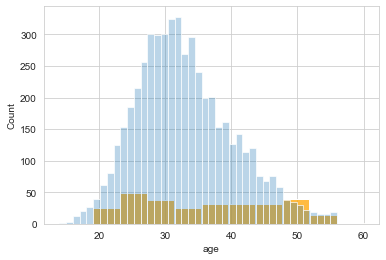

In [13]:
df_men_ingames = df_men.loc[df_men['in_games'] == 1]
df_men_ingames

sns.histplot(data=df_men_ingames, x="age", color="orange")

df_men_nogames = df_men.loc[df_men['in_games'] == 0]
df_men_nogames

sns.histplot(data=df_men_nogames, x="age", alpha=0.3)

In [ ]:
# df_men_ingames = df_men.loc[df_men['in_games'] == 1]
# df_men_ingames

sns.histplot(data=df_men, x="height", color="orange")

# df_men_nogames = df_men.loc[df_men['in_games'] == 0]
# df_men_nogames

# sns.histplot(data=df_men_nogames, x="height", alpha=0.3)

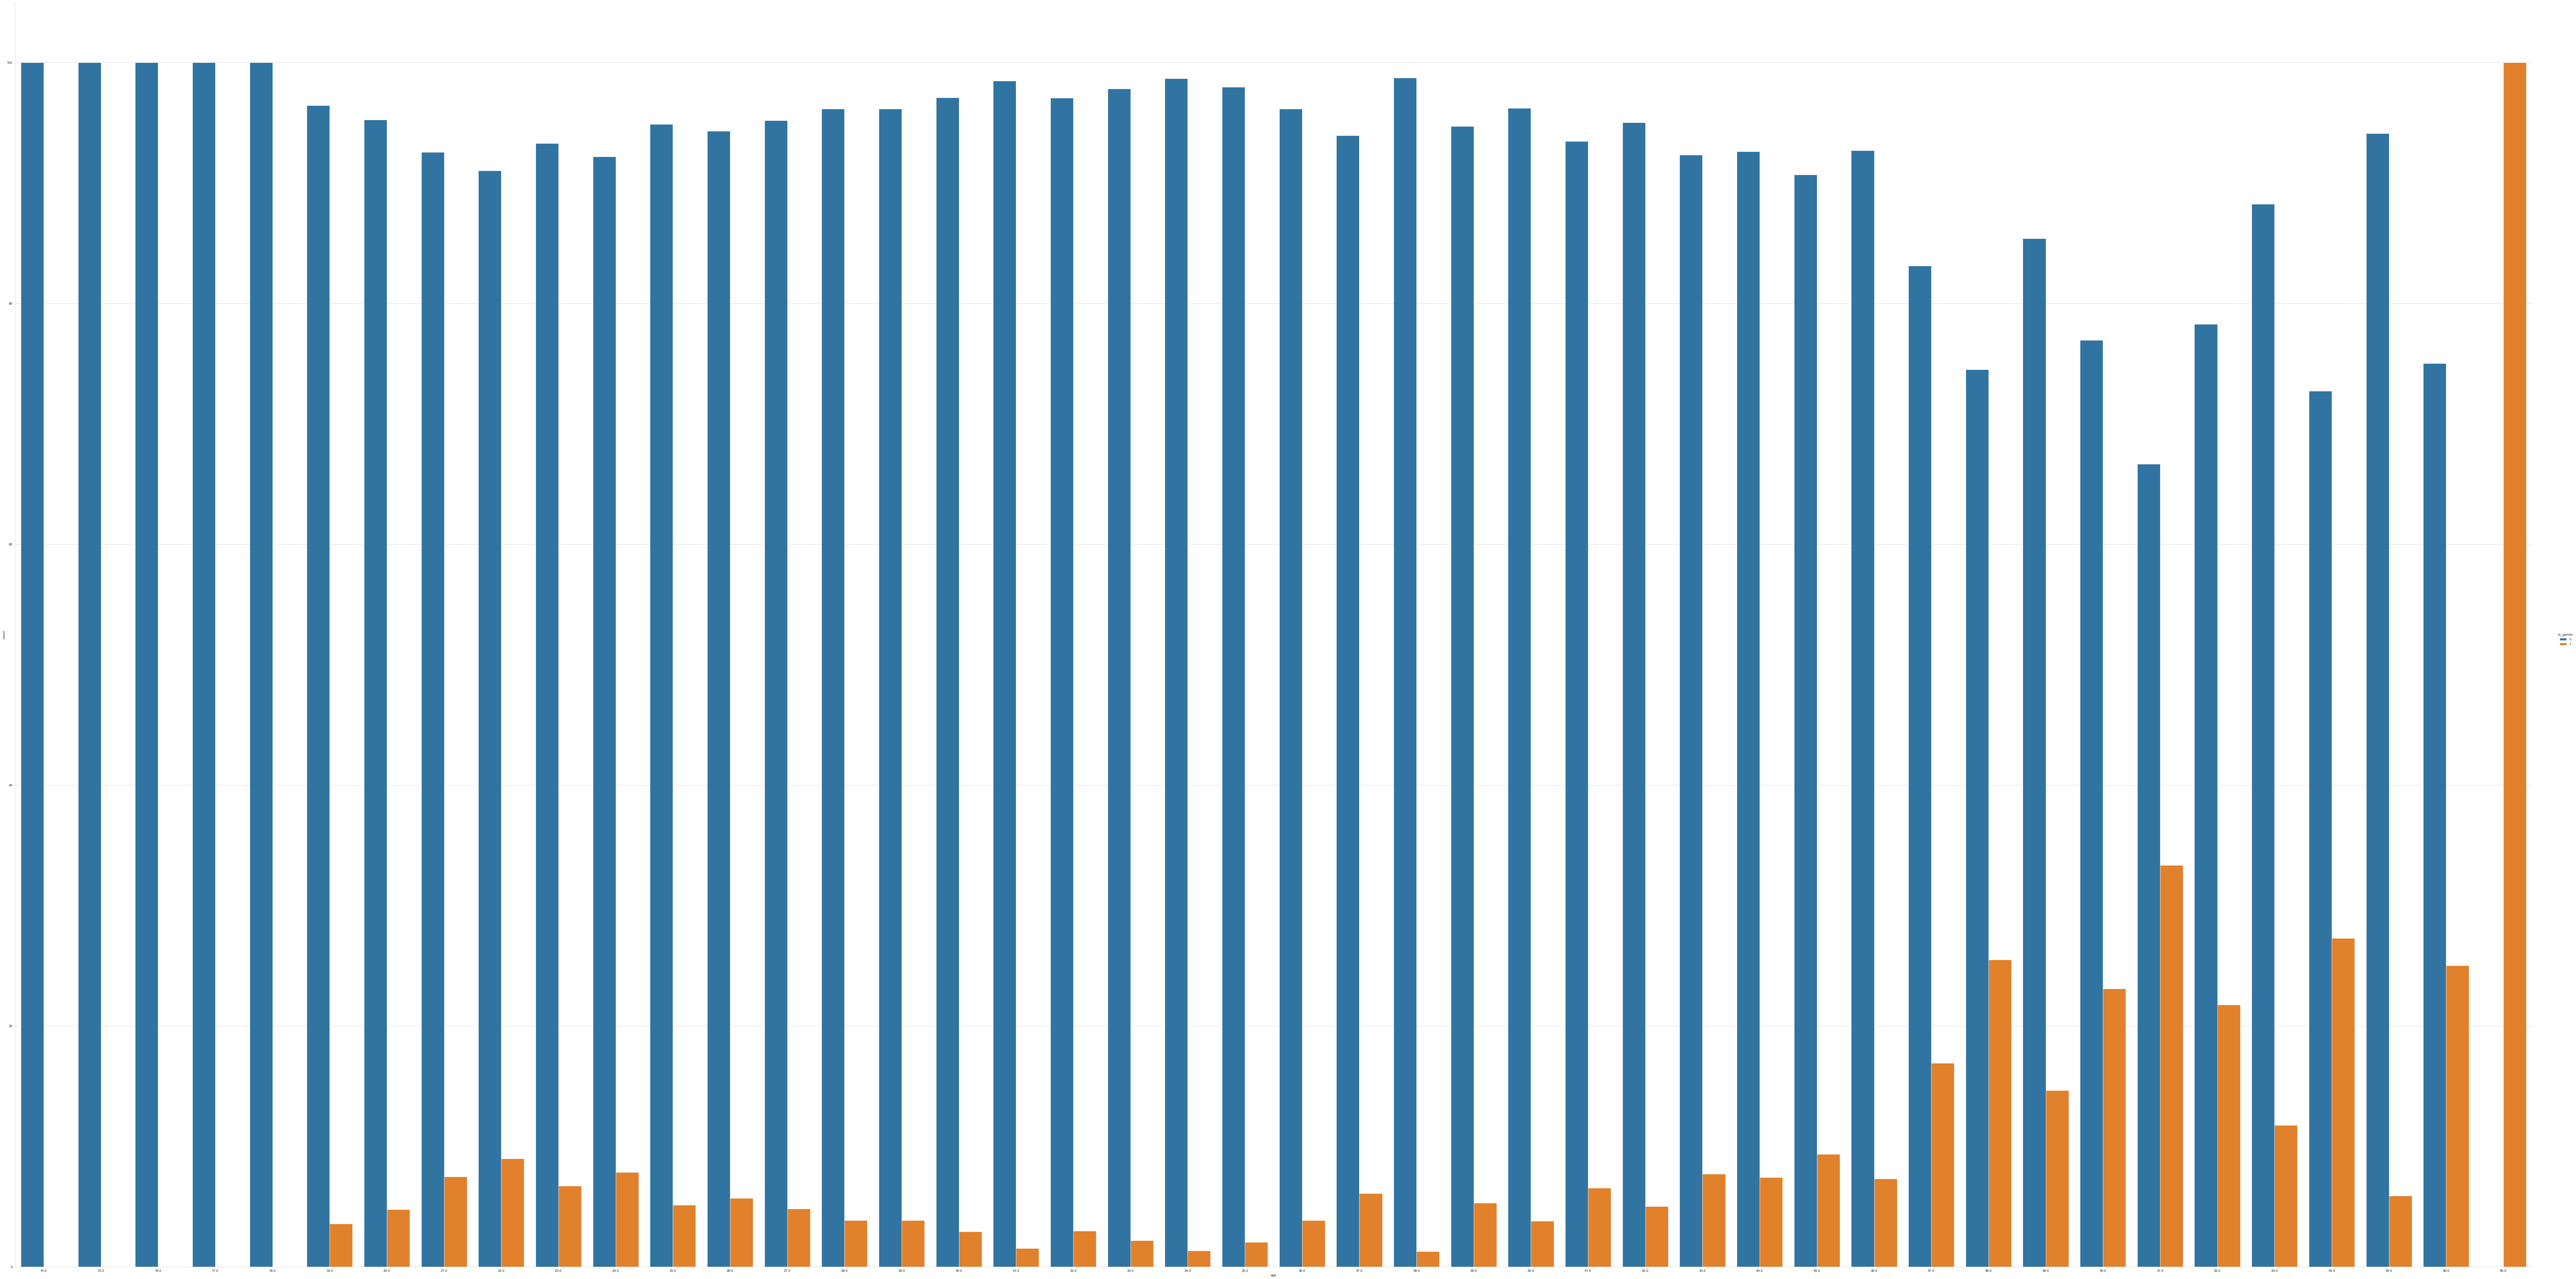

In [12]:
# Normalization + histogram
x,y = 'age', 'in_games'

(df_men
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('count')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='count',hue=y,kind='bar',height=52, aspect=2))

In [13]:
# For me to look at distribution can be deleted after
temp = df_men.groupby('age').count()
temp

,athlete_id,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple,in_games
age,,,,,,,,,,,,,,,,
14.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
16.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
17.0,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
18.0,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
19.0,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
20.0,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
21.0,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
22.0,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89


In [ ]:
x,y = 'age', 'in_games'
sns.histplot(data=df_men, x="flipper_length_mm")

In [ ]:
# Categoryplot for age with in_games hue
# sns.catplot(x='age',kind='count',data=df_men,hue='in_games')

#This is me trying to do a histogram and use density but it doesnt look right
df_men2 = df_men.drop_duplicates(subset=['athlete_id'])
#s = df_men2.index.is_unique
df_men2.set_index('athlete_id', inplace = True)
df_men2.columns
# sns.histplot(
#     df_men2, x='age', hue='in_games',
#     kde=False,multiple="dodge",
#     stat="density", common_norm=False,
#     palette ="bright"
# )

In [ ]:
#Women
df_women.groupby('in_games').mean()